###   Cross-Correlation vs. Convolution(Image)

$$
\begin{align}
G &= h \otimes F \\
G(i,j) &= \sum_{u=-k}^{k} \sum_{v=-k}^{k} h(u,v)F(i+u,j+v)
\end{align}
$$

$$
\begin{align}
G &= h \ast F \\
G(i,j) &= \sum_{u=-k}^{k} \sum_{v=-k}^{k} h(u,v)F(i-u,j-v)
\end{align}
$$

### Finite Impulse Response Convolution(Audio)

$$
y(n) = \sum_{k=0}^{M-1}h(k)x(n-k)
$$

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

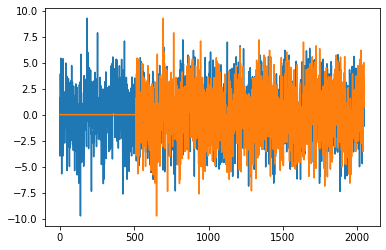

In [2]:
sr = 2048
length = sr * 2
latency= 512

data = np.random.normal(0, 5, length) * 0.5 + np.sin(25 * np.linspace(0, 2*np.pi, length))
y1 = data[:sr]
y2 = np.concatenate((np.zeros(latency), data[:sr-latency]))
plt.plot(y1)
plt.plot(y2)
plt.show()

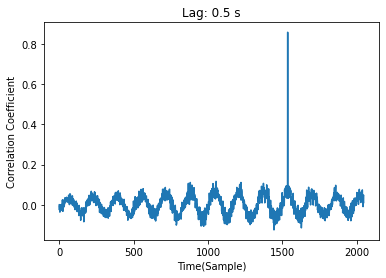

In [3]:
n = len(y1)

y_21 = signal.correlate(y2, y1, mode='same')
y_11 = signal.correlate(y1, y1, mode='same')
y_22 = signal.correlate(y2, y2, mode='same')

correlation = y_21 / np.sqrt(y_11[int(n/2)]  * y_22[int(n/2)])

plt.plot(correlation)
plt.title('Lag: ' + str((np.argmax(correlation) - int(n/2)) / int(n/2)) + ' s')
plt.xlabel('Time(Sample)')
plt.ylabel('Correlation Coefficient')
plt.show()

### Cross Spectrum Density

Cross spectrum is a complex-valued function, the cross spectrum can be estimated from the Fourier transforms of the two time series. In the frequency domain, we compute the cross spectrum as:

$$
\begin{align}
Z_{XY}(n) &= Z_{X}(n)Z_{Y}^*(n) \\
\end{align}
$$